* Target audience: Junior Data Science candidates
* Last updated: June 21st, 2020
* Submission by: Diane Ortiz-MacLeod

# Goal
Using the sklearn breast cancer screening dataset, run through a data preperation exercise, and compare multiple classification methods.

In [171]:
# load required packages
import numpy as np
import pandas as pd

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling -- Feel free to include any additional classifiers to the below list
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Dataset
from sklearn.datasets import load_breast_cancer

# Metrics
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

#Warnings
import warnings
warnings.filterwarnings('ignore')

# Data preparation

The below code imports the data set into memory. `data` is a dictionary with six keys:

* **data**: np.ndarray containing the input features (independent variables) used for classification.
* **target**: np.array containing the labels used for prediction (0 or 1)
* **target_names**: Names corresponding to the target values
* **DESCR**: Description of the data set. 
* **feature_names**: Names of the input features (independent variables)
* **filename**: Location of where the raw data is stored. You will not need to reference this.

Once the data is read into memory, the code calls [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to break the data set up into subsets used for model training and validation. Standard best practice is to use your training set for any pre-modelling analysis.

## Tasks
Perform some simple exploratory data analysis (EDA) to determine the following:

1. The distribution of each feature
2. The correlation between features
    * Tip: Checkout seaborn's [pairplot](https://seaborn.pydata.org/examples/scatterplot_matrix.html) and [correlation](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) examples
3. Whether there are any missing values

In [181]:
# Load the data set
data = load_breast_cancer()

# Uncomment and run the below line to read a full description of the dataset.
print(data['DESCR'])

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'], test_size=0.25, random_state=42)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [155]:
# Put any code required to review distributions and correlations of features.
# We have put the training data into a pandas DataFrame for convenience.

df = pd.DataFrame(
    np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1),
    columns=np.concatenate((data['feature_names'], ['target']), axis=0))

df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.89         13.12           81.89      515.9          0.06955   
1        13.40         20.52           88.64      556.7          0.11060   
2        12.96         18.29           84.18      525.2          0.07351   
3        17.75         28.03          117.30      981.6          0.09997   
4        20.58         22.14          134.70     1290.0          0.09090   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.03729         0.02260              0.01171         0.1337   
1           0.14690         0.14450              0.08172         0.2116   
2           0.07899         0.04057              0.01883         0.1874   
3           0.13140         0.16980              0.08293         0.1713   
4           0.13480         0.16400              0.09561         0.1765   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05581  ...          15.54            87.40       577.0   
1                 0.07325  ...          29.66           113.30       844.4   
2                 0.05899  ...          24.61            96.31       621.9   
3                 0.05916  ...          38.54           145.40      1437.0   
4                 0.05024  ...          27.84           158.30      1656.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0           0.09616             0.1147           0.1186               0.05366   
1           0.15740             0.3856           0.5106               0.20510   
2           0.09329             0.2318           0.1604               0.06608   
3           0.14010             0.3762           0.6399               0.19700   
4           0.11780             0.2920           0.3861               0.19200   

   worst symmetry  worst fractal dimension  target  
0          0.2309                  0.06915     1.0  
1          0.3585                  0.11090     0.0  
2          0.3207                  0.07247     1.0  
3          0.2972                  0.09075     0.0  
4          0.2909                  0.05865     0.0  

[5 rows x 31 columns]

In [156]:
df.shape

(426, 31)

In [157]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   426.000000    426.000000      426.000000   426.000000   
mean     14.122664     19.198850       91.885023   654.919484   
std       3.534740      4.230755       24.304457   356.441156   
min       7.691000      9.710000       47.920000   170.400000   
25%      11.717500     16.180000       75.502500   421.650000   
50%      13.270000     18.690000       85.935000   545.650000   
75%      15.750000     21.587500      104.175000   780.400000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       426.000000        426.000000      426.000000           426.000000   
mean          0.095556          0.102507        0.087470             0.047744   
std           0.013971          0.051469        0.078612             0.037861   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.085193          0.062460        0.028972             0.020325   
50%           0.094370          0.090505        0.061400             0.033065   
75%           0.104275          0.130575        0.128775             0.070403   
max           0.163400          0.311400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     426.000000              426.000000  ...     426.000000   
mean        0.180024                0.062607  ...      25.506878   
std         0.026818                0.007227  ...       6.026980   
min         0.116700                0.049960  ...      12.020000   
25%         0.161425                0.057510  ...      21.037500   
50%         0.178150                0.061295  ...      25.100000   
75%         0.195375                0.065975  ...      29.490000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       426.000000   426.000000        426.000000         426.000000   
mean        106.886784   873.720657          0.131202           0.247729   
std          33.074905   565.243971          0.023224           0.149395   
min          54.490000   223.600000          0.071170           0.027290   
25%          84.465000   520.700000          0.114200           0.141650   
50%          97.665000   686.550000          0.130100           0.206250   
75%         123.475000  1030.750000          0.145900           0.341175   
max         251.200000  4254.000000          0.218400           0.937900   

       worst concavity  worst concave points  worst symmetry  \
count       426.000000            426.000000      426.000000   
mean          0.267698              0.112653        0.287797   
std           0.198973              0.064429        0.061577   
min           0.000000              0.000000        0.156500   
25%           0.114425              0.063058        0.247775   
50%           0.225450              0.098095        0.281050   
75%           0.382075              0.157250        0.315450   
max           0.960800              0.291000        0.663800   

       worst fractal dimension      target  
count               426.000000  426.000000  
mean                  0.083346    0.629108  
std                   0.017581    0.483612  
min                   0.055040    0.000000  
25%                   0.070642    0.000000  
50%                   0.079870    1.000000  
75%                   0.091838    1.000000  
max                   0.173000    1.000000  

[8 rows x 31 columns]

In [158]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [159]:
#Check to see if there are missing values
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

<br> There are no missing values in our dataset, we can move on. 

<br>

Number of Benign '1' :  268
Number of Malignant '0' :  158


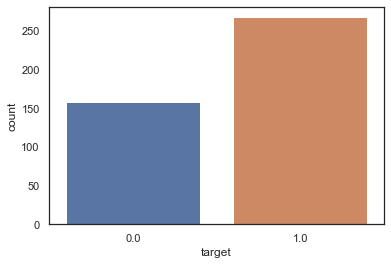

In [160]:
# Target distribution
y = df.target

ax = sns.countplot(y,label='Count') 
B, M = y.value_counts()

print('Number of Benign \'1\' : ',B)
print('Number of Malignant \'0\' : ',M)

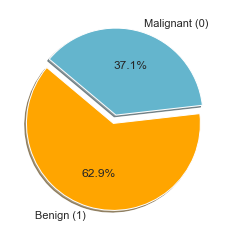

In [161]:
#Percentage distribution 

labels = 'Benign (1)', 'Malignant (0)'
sizes = [B, M]
colors = ['orange', 'c']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

<br> We are working with a small sample size, as well our target values are **imbalanced** which may result in our models over or under fitting. A few ways to address this is by performing over or undersampling, SMOTE, etc. techniques. In this case we will later use **class weight** from SciKit-Learn during classification to address the imbalance. 

<br>

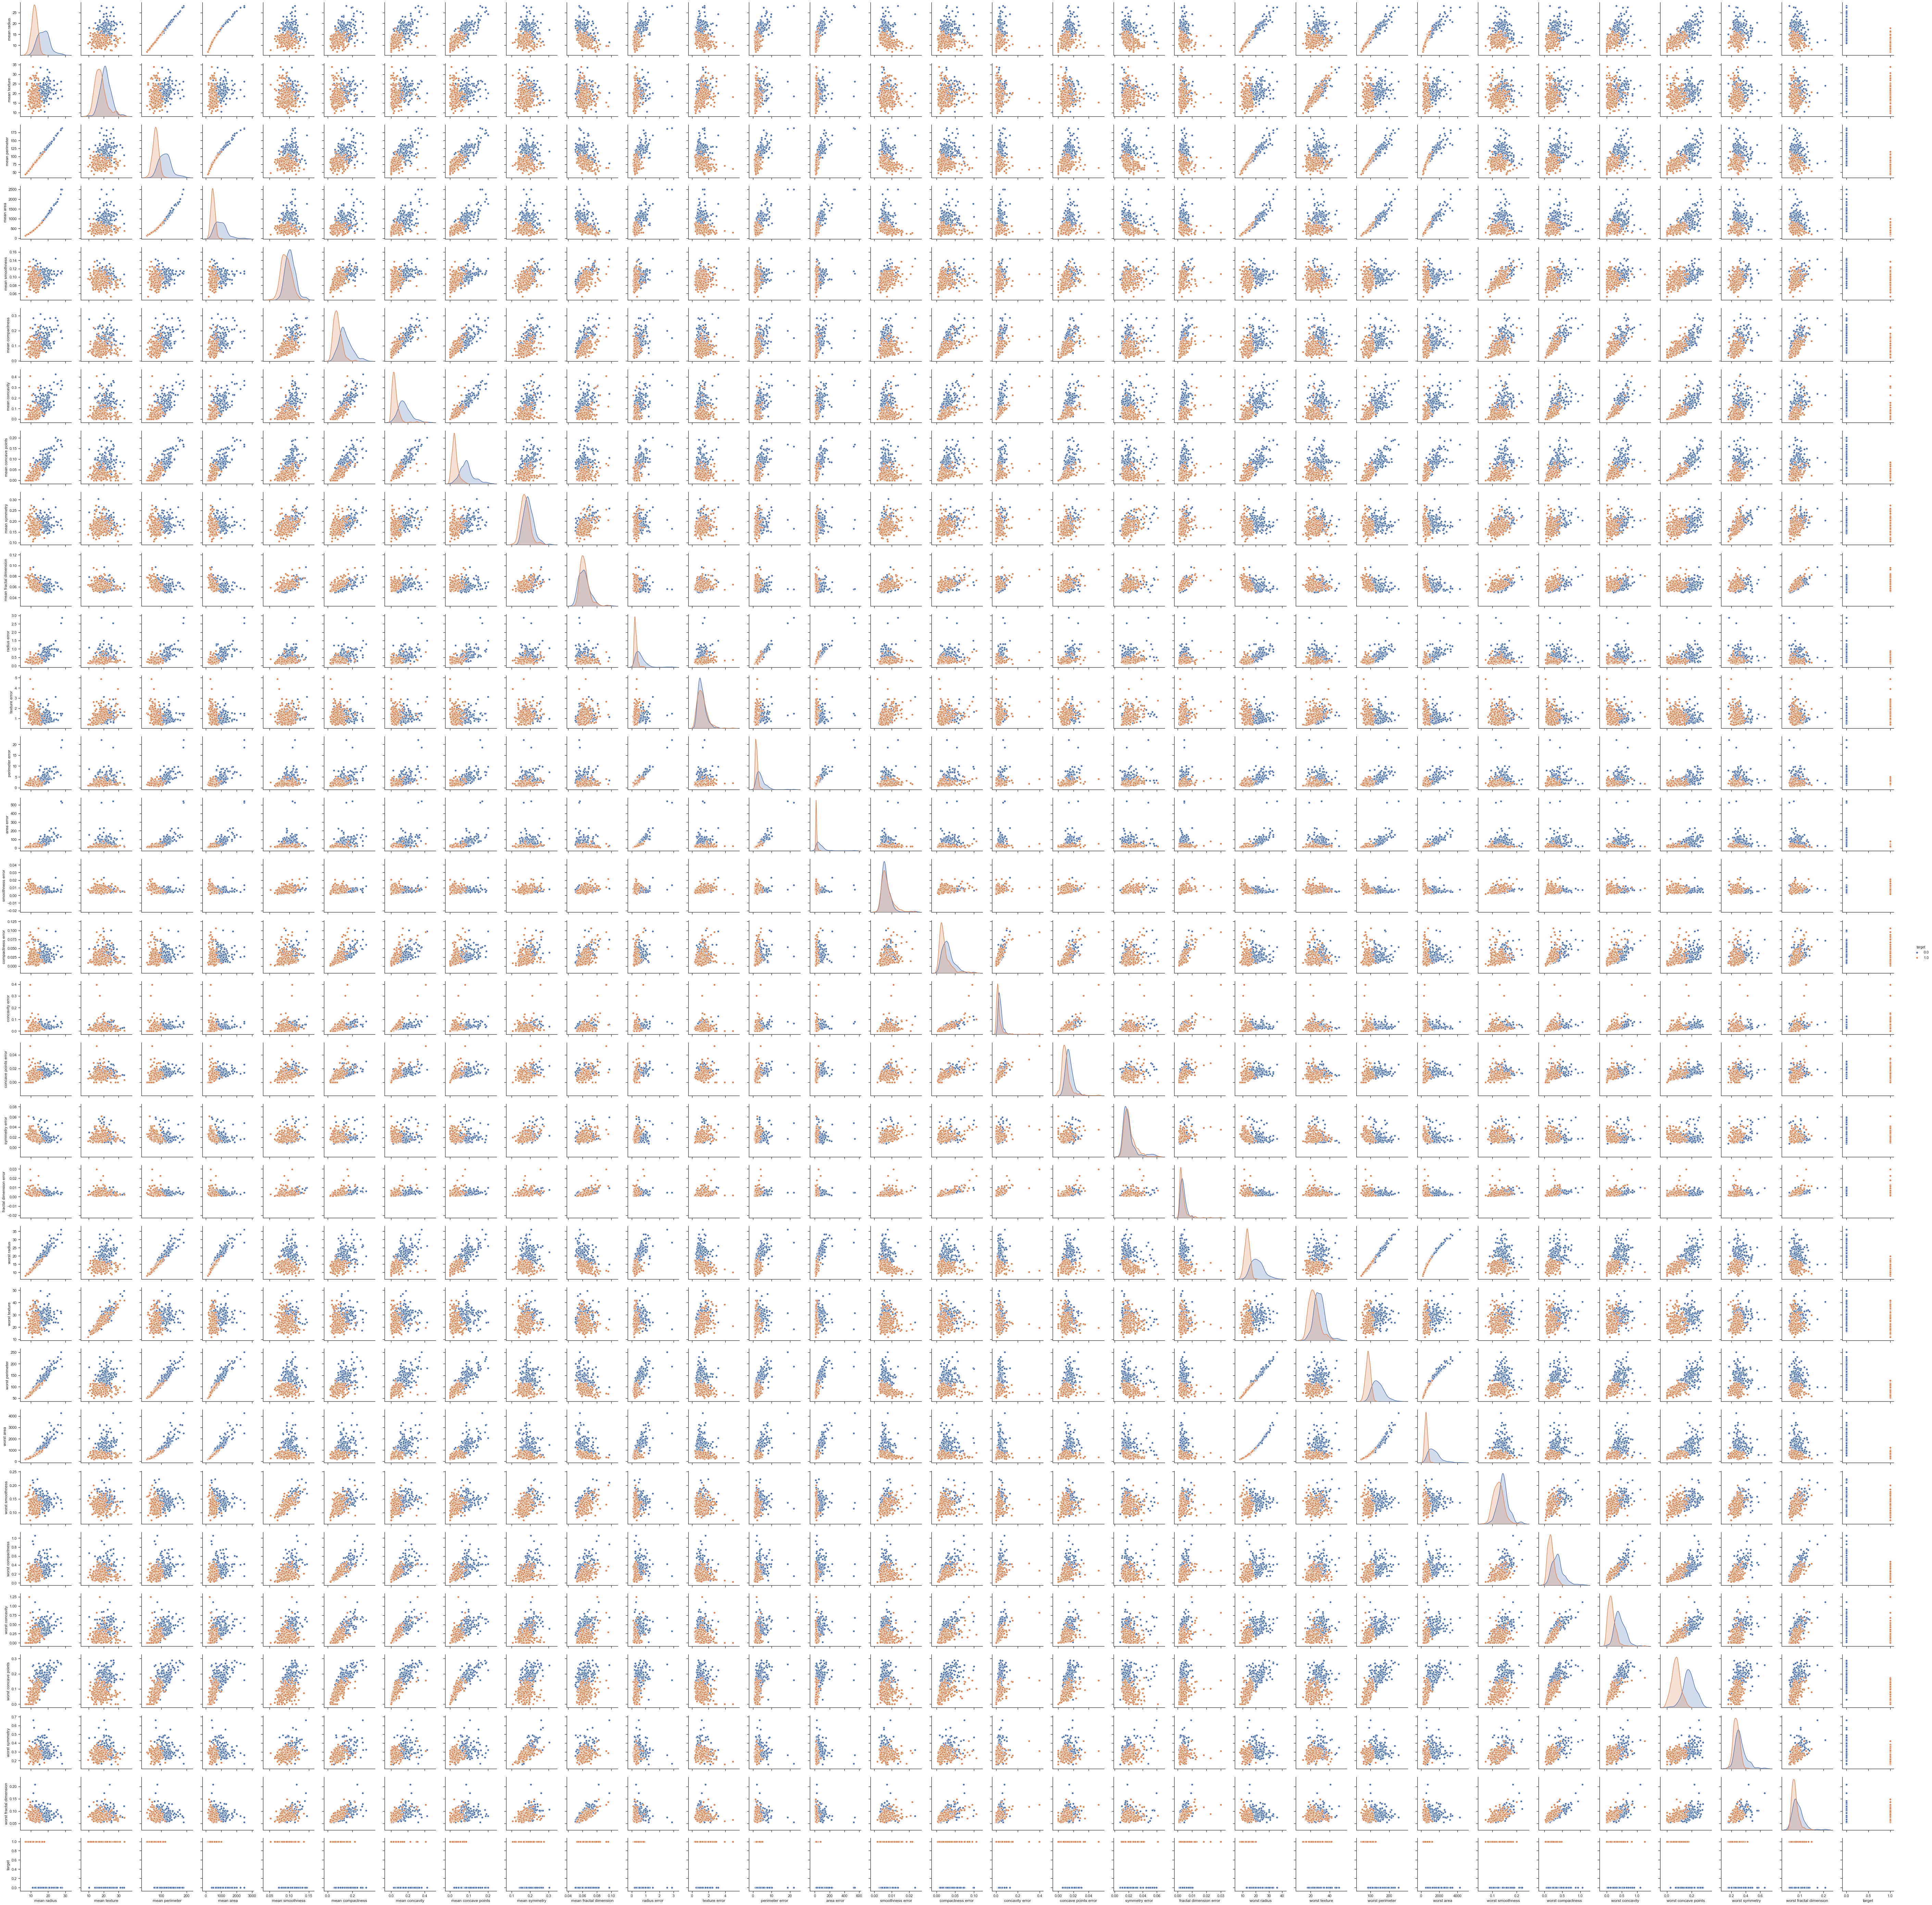

In [132]:
#Distribution of each feature
sns.set(style='ticks')
sns.pairplot(df.iloc[:,:], hue='target')
plt.show()

<br> Our feature distributions are **right-skewed**, which can affect a model to interpret tail regions as outliers. This can be addressed with normalization/standardization or square root or log transformations. In this case we will use SciKit-Learn's **StandardScaler** function. 

<br>

Additionally, we notice that there are numerous types of correlations (clusters, linear, etc.). Different models may work better with different types of correlations for example use K-Nearest-Neighbors classification for features with cluster correlations. For future analysis this would be useful to consider when conducting feature selection.

<br>

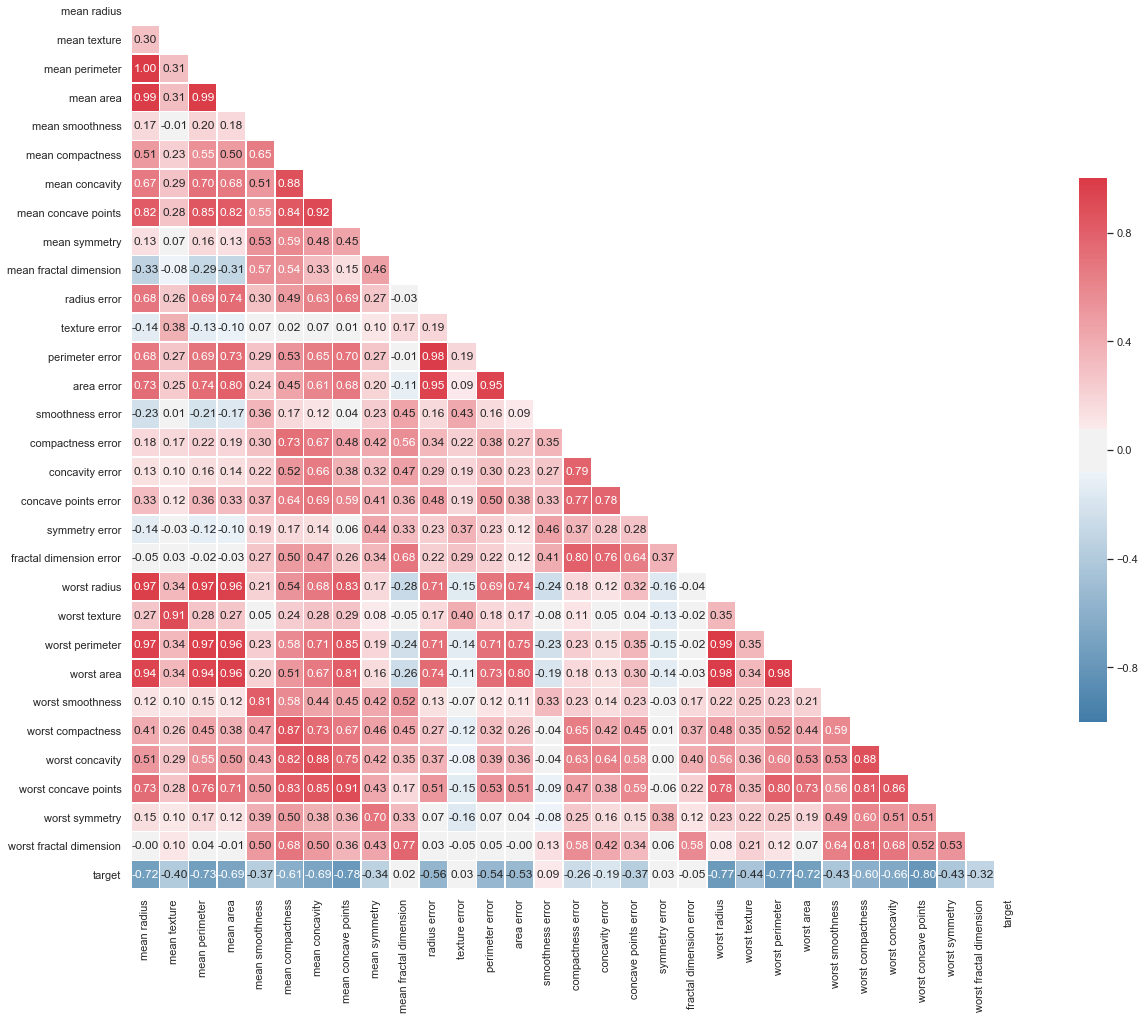

In [133]:
#Correlations 

#Visualize the correlations with a heatmap
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, 
                 cbar_kws={"shrink": .5}, fmt= '.2f', annot=True)
ax.set_ylim(31)
plt.show()

<br>We notice that the correlations range widely from -1 to 1. For future analysis, it may be useful to model on different groups of correlations, for example positivey correlated, negatively correlated, and uncorrelated as different models may work best with each group.

<br>

In [4]:
# Put any pre-processing code here. We recommend running classification without any data transformations first to get a baseline accuracy.

In [180]:
#Baseline accuracy for models

#1
LR = LogisticRegression()
scoring = ['f1', 'precision', 'recall', 'accuracy']
scores1 = cross_validate(LR, X_train, y_train, scoring=scoring)
sorted(scores1.keys())
LR_f1 = scores1['test_f1'].mean()
LR_precision = scores1['test_precision'].mean()
LR_recall = scores1['test_recall'].mean()
LR_accuracy = scores1['test_accuracy'].mean()

#2
SVM = SVC() #probability = true in paranthesis ? 
scoring = ['f1', 'precision', 'recall', 'accuracy']
scores2 = cross_validate(SVM, X_train, y_train, scoring=scoring)
sorted(scores2.keys())
SVM_f1 = scores2['test_f1'].mean()
SVM_precision = scores2['test_precision'].mean()
SVM_recall = scores2['test_recall'].mean() 
SVM_accuracy = scores2['test_accuracy'].mean()

#3
DT = DecisionTreeClassifier()
scoring = ['f1', 'precision', 'recall', 'accuracy']
scores3 = cross_validate(DT, X_train, y_train, scoring=scoring)
sorted(scores3.keys())
DT_f1 = scores3['test_f1'].mean()
DT_precision = scores3['test_precision'].mean()
DT_recall = scores3['test_recall'].mean()
DT_accuracy = scores3['test_accuracy'].mean()

#4
RF = RandomForestClassifier()
scoring = ['f1', 'precision', 'recall', 'accuracy']
scores4 = cross_validate(RF, X_train, y_train, scoring=scoring)
sorted(scores4.keys())
RF_f1 = scores4['test_f1'].mean()
RF_precision = scores4['test_precision'].mean()
RF_recall = scores4['test_recall'].mean()
RF_accuracy = scores4['test_accuracy'].mean()

#5
KNN = KNeighborsClassifier()
scoring = ['f1', 'precision', 'recall', 'accuracy']
scores5 = cross_validate(KNN, X_train, y_train, scoring=scoring)
sorted(scores5.keys())
KNN_f1 = scores5['test_f1'].mean()
KNN_precision = scores5['test_precision'].mean()
KNN_recall = scores5['test_recall'].mean()
KNN_accuracy = scores5['test_accuracy'].mean()

#6
GNB = GaussianNB()
scoring = ['f1', 'precision', 'recall', 'accuracy']
scores6 = cross_validate(GNB, X_train, y_train, scoring=scoring)
sorted(scores6.keys())
GNB_f1 = scores6['test_f1'].mean()
GNB_precision = scores6['test_precision'].mean()
GNB_recall = scores6['test_recall'].mean()
GNB_accuracy = scores6['test_accuracy'].mean()

#Record scores in dataframe
models_1 = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Support Vector Machine', 'Decision Tree',
                     'Random Forest', 'K-Nearest Neighbors', 'Gaussian Naive Bayes'], 
    'f1'          : [LR_f1, SVM_f1, DT_f1, RF_f1, KNN_f1, GNB_f1],
    'precision'   : [LR_precision, SVM_precision, DT_precision, RF_precision, KNN_precision, GNB_precision],
    'recall'      : [LR_recall, SVM_recall, DT_recall, RF_recall, KNN_recall, GNB_recall],
    'accuracy'    : [LR_accuracy, SVM_accuracy, DT_accuracy, RF_accuracy, KNN_accuracy, GNB_accuracy],
    }, columns = ['Model', 'f1', 'precision', 'recall', 'accuracy'])

models_1

Model        f1  precision    recall  accuracy
0     Logistic Regression  0.955553   0.948781  0.962755  0.943610
1  Support Vector Machine  0.772336   0.629112  1.000000  0.629112
2           Decision Tree  0.931919   0.943143  0.921598  0.915457
3           Random Forest  0.955486   0.948612  0.962630  0.943644
4     K-Nearest Neighbors  0.945760   0.919569  0.973866  0.929492
5    Gaussian Naive Bayes  0.942629   0.931273  0.955139  0.927195

<br>

Now that we have a baseline accuracy, we can perform some data transformations as well as finetune our classifier parameters to improve the metrics.<br>

In [163]:
#Standard scaling to address abnormal distribution

#separate target and feature data
y = df['target']
X = df.drop('target',axis=1)

#standardscaling 
model_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = model_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

#store normalized values into dataframe
df = pd.DataFrame(
    np.concatenate((X_scaled, y_train.reshape(-1, 1)), axis=1),
    columns=np.concatenate((data['feature_names'], ['target']), axis=0))
df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.349138     -1.438513       -0.411726  -0.390479        -1.863662   
1    -0.204687      0.312640       -0.133673  -0.275880         1.078073   
2    -0.329312     -0.215072       -0.317394  -0.364357        -1.579880   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0         -1.268607       -0.826171            -0.952866      -1.729368   
1          0.863546        0.726314             0.898441       1.178770   
2         -0.457451       -0.597310            -0.764588       0.275343   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0               -0.941541  ...      -1.655655        -0.589864   -0.525560   
1                1.474377  ...       0.689899         0.194128   -0.051934   
2               -0.501024  ...      -0.148985        -0.320159   -0.446032   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0         -1.510669          -0.891500        -0.750217             -0.916711   
1          1.129415           0.923942         1.222217              1.436560   
2         -1.634396          -0.106752        -0.539891             -0.723713   

   worst symmetry  worst fractal dimension  target  
0       -0.925086                -0.808411     1.0  
1        1.149559                 1.569111     0.0  
2        0.534970                -0.619348     1.0  

[3 rows x 31 columns]

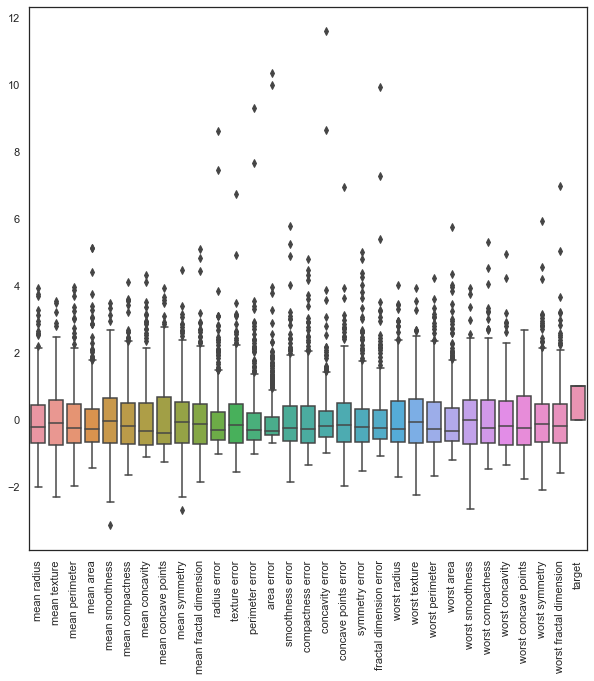

In [138]:
#Plot boxplot and view distribution/outliers
plt.figure(figsize=(10,10)) 
sns.boxplot(data=df) #x='feature_names', y='target' to use hue='target'
plt.xticks(rotation=90)
plt.show()

<br>

We can see that StandardScaler improved distribution which will improve our models. Note that there are still significant outliers in our data which can affect our models if classifiers interpret them to be tail regions. 

**Questions along the way:** When and how to remedy the issue of outliers? (ie. using z-scores > 3, or finding values outside of interquartile range, or other?)

<br>

Now that we've performed our data transformations, let's play with different parameters per classifier.<br>

# Model Selection

Using the above training data sets, train a classifier and calculate the following metrics on both training and testing data sets:

* f1
* precision
* recall
* accuracy

And any other metric you thing is appropriate. See [Sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation) for a full list. We have implemented a RandomForestClassifier for you to get started. Feel free to adjust the code as you see fit. <br>


In [164]:
#Determining the best parameters for SVM, prioritizing precision and recall 

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print('# Tuning hyper-parameters for %s' % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print('Best parameters set found on development set:')
    print()
    print(clf.best_params_)
    print()
    print('Grid scores on development set:')
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print('%0.3f (+/-%0.03f) for %r'
              % (mean, std * 2, params))
    print()
    
    print('The model is trained on the full development set.')
    print('The scores are computed on the full evaluation set.')

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.915 (+/-0.029) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.934 (+/-0.031) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.907 (+/-0.042) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.946 (+/-0.048) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.907 (+/-0.042) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.948 (+/-0.041) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.907 (+/-0.042) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.933 (+/-0.040) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.944 (+/-0.019) for {'C': 1, 'kernel': 'linear'}
0.964 (+/-0.016) for {'C': 10, 'kernel': 'linear'}
0.941 (+/-0.028) for {'C': 100, 'kernel': 'linear'}
0.952 (+/-0.034) for {'C': 1000, 'kernel': 'linear'}

The model is trained on the full development set.
The scores are computed on the full evaluation set.
# Tuning hyper-para

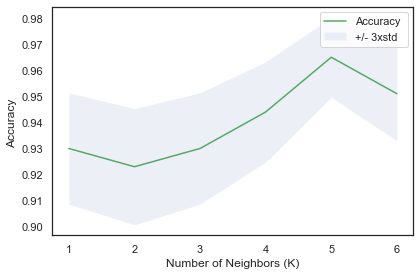

The best accuracy was with 0.965034965034965 with k= 5


In [165]:
#Determining best parameters for KNN n_neighbors

Ks = 7
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train model and predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( 'The best accuracy was with', mean_acc.max(), 'with k=', mean_acc.argmax()+1) 

<br>

**Questions along the way :** What are other methods to test multiple parameters at once to optimize a model?

<br>

In [179]:
#New models with updated parameters

#1
LR = LogisticRegression(class_weight='balanced',random_state=42, solver='liblinear')
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']
scores1 = cross_validate(LR, X_train, y_train, scoring=scoring)
sorted(scores1.keys())
LR_f1 = scores1['test_f1'].mean()
LR_precision = scores1['test_precision'].mean()
LR_recall = scores1['test_recall'].mean()
LR_accuracy = scores1['test_accuracy'].mean()

#2
SVM = SVC(kernel='linear', probability=True, class_weight='balanced',random_state=42, C=10)
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']
scores2 = cross_validate(SVM, X_train, y_train, scoring=scoring)
sorted(scores2.keys())
SVM_f1 = scores2['test_f1'].mean()
SVM_precision = scores2['test_precision'].mean()
SVM_recall = scores2['test_recall'].mean() 
SVM_accuracy = scores2['test_accuracy'].mean()

#3
DT = DecisionTreeClassifier(max_depth=20, random_state=42, class_weight='balanced')
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']
scores3 = cross_validate(DT, X_train, y_train, scoring=scoring)
sorted(scores3.keys())
DT_f1 = scores3['test_f1'].mean()
DT_precision = scores3['test_precision'].mean()
DT_recall = scores3['test_recall'].mean()
DT_accuracy = scores3['test_accuracy'].mean()

#4
RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']
scores4 = cross_validate(RF, X_train, y_train, scoring=scoring)
sorted(scores4.keys())
RF_f1 = scores4['test_f1'].mean()
RF_precision = scores4['test_precision'].mean()
RF_recall = scores4['test_recall'].mean()
RF_accuracy = scores4['test_accuracy'].mean()

#5
KNN = KNeighborsClassifier(n_neighbors=5)
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']
scores5 = cross_validate(KNN, X_train, y_train, scoring=scoring)
sorted(scores5.keys())
KNN_f1 = scores5['test_f1'].mean()
KNN_precision = scores5['test_precision'].mean()
KNN_recall = scores5['test_recall'].mean()
KNN_accuracy = scores5['test_accuracy'].mean()

#6
GNB = GaussianNB()
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']
scores6 = cross_validate(GNB, X_train, y_train, scoring=scoring)
sorted(scores6.keys())
GNB_f1 = scores6['test_f1'].mean()
GNB_precision = scores6['test_precision'].mean()
GNB_recall = scores6['test_recall'].mean()
GNB_accuracy = scores6['test_accuracy'].mean()

#Record scores in dataframe
models_2 = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Support Vector Machine', 'Decision Tree',
                     'Random Forest', 'K-Nearest Neighbors', 'Gaussian Naive Bayes'], 
    'f1'          : [LR_f1, SVM_f1, DT_f1, RF_f1, KNN_f1, GNB_f1],
    'precision'   : [LR_precision, SVM_precision, DT_precision, RF_precision, KNN_precision, GNB_precision],
    'recall'      : [LR_recall, SVM_recall, DT_recall, RF_recall, KNN_recall, GNB_recall],
    'accuracy'    : [LR_accuracy, SVM_accuracy, DT_accuracy, RF_accuracy, KNN_accuracy, GNB_accuracy],
    }, columns = ['Model', 'f1', 'precision', 'recall', 'accuracy'])

models_2

Model        f1  precision    recall  accuracy
0     Logistic Regression  0.953108   0.958624  0.947815  0.941312
1  Support Vector Machine  0.968321   0.966542  0.970121  0.960060
2           Decision Tree  0.929581   0.942752  0.917769  0.913093
3           Random Forest  0.972435   0.960101  0.985102  0.964837
4     K-Nearest Neighbors  0.945760   0.919569  0.973866  0.929492
5    Gaussian Naive Bayes  0.942629   0.931273  0.955139  0.927195

<br>

The above models_2 is the better overall result after finetuning the different parameters of each classifier. 

<br>

**Questions along the way :** Even though Random Forest has the best score - is it best classifier? 

<br>

Finally, let's take a look at performance with confusion matrix metric.<br>

In [183]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[85  4]
 [ 3 51]]


# Questions

* Which classifier do you recommend, and why?
    * In this scenario, the Random Forest has the best metric scores, but I am not entirely sold it is the best classifier for this project. SVC and Logistic Regression performed well too. 
* Are there any pre-processing that should be done?
    * The necessary preprocessing steps in this project were to address:
        * imbalanced target values- remedied by class weight parameter in classifiers
        * right-skewed distribution- remedied by standard scaling via Sci-Kit Learn
    * Additional necessary steps for further improvement of models would be to address:
        * outliers- data points that are outliers can be misinterpreted by classifiers as tailed regions, as well thinly tailed regions could be misinterpreted by classifiers as outliers which could result in over or underfitting; would a remedy be to remove the rows or columns altogether with outliers?
        * small sample size- it would be best to address small sample size with resampling and increasing the size of the train set relative to the test set to provide a more reliable estimate; this could be done  using K-fold cross validation
        * correlation differences- certain classifiers are best suited for certain correlation styles, ie. KNN classifiers work best on cluster correlations; would the best way to accomodate this be to conduct feature selection that optimizes features with their best models?
* What other features not available in this data set would you be interesting in incorporating if available?
    * There are features known to the general public as high-risk for breast cancer. For example, it is common knowledge that women who have not breast-fed, have not given birth, who have had breast cancer in the past, and whose relatives have had breast cancer are at higher risk. Therefore, specific features pertaining to medical history might be interesting to incorporate into this project if available. 
* Given the classification problem of determining the type of tumor, which one of the above metrics is most important and why?
    * Hint: Think of what it means to have a false positive or false negative.
        * Each metric has their special function depending on what is prioritized. For example
            * accuracy (ie. correct predicitons) is effective only when dealing with a well-balanced dataset
            * confusion matrix is best when false negatives and false positives are minimized ideally to 0. In this particicular scenario reducing false negatives would be prioritized since a false positive classification could be more detrimental-- it might mean that someone with a potentially cancerous tumor would not receive further treatment if their tumor was falsely labelled benign, for example. 
            * precision would tell us the proportion of cases labelled malignant out of all malignant cases
            * recall might be prioritized higher than precision in this situation as it tells us the proportion of cases labelled malignant that were actually malignant
            * f-1 provides a score that represents precision and recall

#### Note about the "**Questions along the way**"
In certain markdown cells above, questions outlined are ones that I faced while conducting this assignment. They are not literal questions for you to answer, but moreso to highlight my information gaps and to hold myself accountable for further personal development. 